## --> PCA reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.

## Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Custom Implementation of PCA

In [2]:
class CustomPCA:
    def __init__(self, n_components=2):
        self.n_components = n_components

    def fit(self, X):
        # subtracting mean from every row of respective column
        self.mean = np.mean(X, axis=0)
        X -= self.mean

        # calculation of covarince matrix of mean-centered data
        cov_matrix = np.cov(X.T)

        # compute the eigenvalues & eigenvectors
        # each vector represents a principal axis.
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
        eigen_vectors = eigen_vectors.T

        # Sort Eigenvalues in descending order
        sorted_index = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[sorted_index]
        eigen_vectors = eigen_vectors[sorted_index]

        # selecting a subset from the sorted eigenvalue matrix
        self.compo = eigen_vectors[0:self.n_components]

    # transform the data
    def transform(self, X):
        X -= self.mean
        return np.dot(X, self.compo.T)


## Loading Dataset

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X = data.data 
y = data.target

X.shape , y.shape

((150, 4), (150,))

## Model

In [6]:
model= CustomPCA(2)
model.fit(X)

In [7]:
X_transform = model.transform(X)
X.shape , X_transform.shape

((150, 4), (150, 2))

## Visualization 

In [8]:
classes = ['Iris-Setosa','Iris-Versicolour' ,'Iris-Virginica']

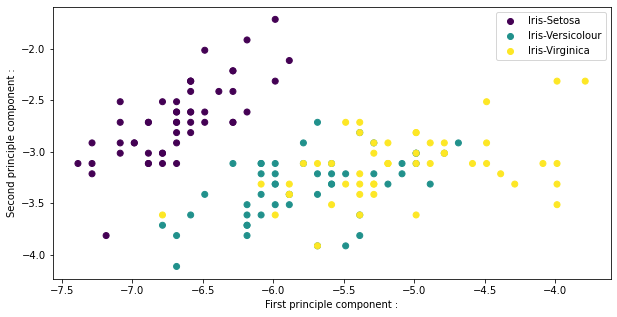

In [9]:
plt.figure(figsize=(10, 5))

scatter = plt.scatter(X[:, 0], X[:, 1], c=data['target'])
plt.xlabel("First principle component :")
plt.ylabel("Second principle component :")

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

## Covariance Matrix

<AxesSubplot:>

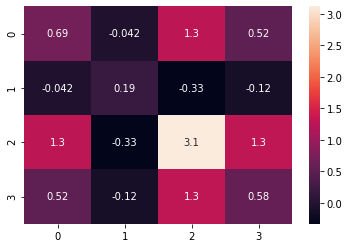

In [10]:
sns.heatmap(np.cov(X.T), annot=True)

<AxesSubplot:>

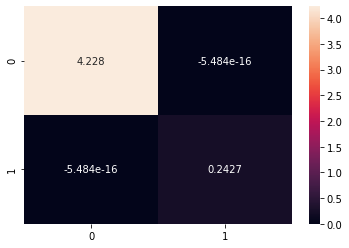

In [11]:
sns.heatmap(np.cov(X_transform.T) , annot=True ,fmt='.4g')